In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("C:\\Users\\INDIA\\Downloads\\Assignment csv file\\Fraud_check.csv")
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


# Data Pre-Processing

In [3]:
data.shape

(600, 6)

In [4]:
data.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [5]:
data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [6]:
data.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [7]:
data.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [9]:
data['Taxable.Income'].unique()#==> Target varibale

array([68833, 33700, 36925, 50190, 81002, 33329, 83357, 62774, 83519,
       98152, 29732, 61063, 11794, 61830, 64070, 69869, 24987, 39476,
       97957, 10987, 88636, 14310, 78969, 92040, 38239, 31417, 55299,
       87778, 10379, 94033, 73854, 64007, 97200, 82071, 12514, 31336,
       10163, 68513, 14912, 74010, 50777, 49436, 96485, 70339, 33614,
       81079, 31532, 44034, 16264, 45706, 79616, 40137, 97703, 21917,
       81939, 19925, 34703, 78573, 10870, 65065, 94418, 26972, 91684,
       51685, 62158, 58312, 42507, 61486, 10150, 99619, 89302, 94287,
       41344, 41382, 32434, 61105, 67628, 31458, 73411, 10329, 44947,
       35610, 66564, 87348, 69098, 28449, 39277, 13747, 86652, 26741,
       77634, 99325, 85651, 15296, 10348, 41395, 22258, 79583, 22187,
       52495, 93078, 35072, 32662, 89250, 41641, 55873, 19169, 46629,
       51927, 69224, 24557, 77762, 96355, 90910, 21945, 79357, 42784,
       54638, 29944, 97318, 52022, 20391, 21016, 26679, 70682, 87326,
       15853, 75501,

In [10]:
len(data['Taxable.Income'].unique())

599

In [11]:
data['Taxable.Income'].values

array([68833, 33700, 36925, 50190, 81002, 33329, 83357, 62774, 83519,
       98152, 29732, 61063, 11794, 61830, 64070, 69869, 24987, 39476,
       97957, 10987, 88636, 14310, 78969, 92040, 38239, 31417, 55299,
       87778, 10379, 94033, 73854, 64007, 97200, 82071, 12514, 31336,
       10163, 68513, 14912, 74010, 50777, 49436, 96485, 70339, 33614,
       81079, 31532, 44034, 16264, 45706, 79616, 40137, 97703, 21917,
       81939, 19925, 34703, 78573, 10870, 65065, 94418, 26972, 91684,
       51685, 62158, 58312, 42507, 61486, 10150, 99619, 89302, 94287,
       41344, 41382, 32434, 61105, 67628, 31458, 73411, 10329, 44947,
       35610, 66564, 87348, 69098, 28449, 39277, 13747, 86652, 26741,
       77634, 99325, 85651, 15296, 10348, 41395, 22258, 79583, 22187,
       52495, 93078, 35072, 32662, 89250, 41641, 55873, 19169, 46629,
       51927, 69224, 24557, 77762, 96355, 90910, 21945, 79357, 42784,
       54638, 29944, 97318, 52022, 20391, 21016, 26679, 70682, 87326,
       15853, 75501,

In [18]:
rk =pd.Series([68833, 33700, 36925, 50190, 81002, 33329, 83357, 62774, 83519,
       98152, 29732, 61063, 11794, 61830, 64070, 69869, 24987, 39476,
       97957, 10987, 88636, 14310, 78969, 92040, 38239, 31417, 55299,
       87778, 10379, 94033, 73854, 64007, 97200, 82071, 12514, 31336,
       10163, 68513, 14912, 74010, 50777, 49436, 96485, 70339, 33614,
       81079, 31532, 44034, 16264, 45706, 79616, 40137, 97703, 21917,
       81939, 19925, 34703, 78573, 10870, 65065, 94418, 26972, 91684,
       51685, 62158, 58312, 42507, 61486, 10150, 99619, 89302, 94287,
       41344, 41382, 32434, 61105, 67628, 31458, 73411, 10329, 44947,
       35610, 66564, 87348, 69098, 28449, 39277, 13747, 86652, 26741,
       77634, 99325, 85651, 15296, 10348, 41395, 22258, 79583, 22187,
       52495, 93078, 35072, 32662, 89250, 41641, 55873, 19169, 46629,
       51927, 69224, 24557, 77762, 96355, 90910, 21945, 79357, 42784,
       54638, 29944, 97318, 52022, 20391, 21016, 26679, 70682, 87326,
       15853, 75501, 97984, 53378, 93458, 56501, 46955, 33492, 35832,
       12470, 53981, 22773, 84691, 50087, 27877, 56647, 59419, 26783,
       79453, 33962, 84429, 63057, 43128, 40220, 79700, 67083, 22054,
       18192, 25222, 58635, 39114, 48738, 28496, 62209, 87677, 93659,
       56503, 27081, 48779, 91304, 49520, 41117, 18199, 76992, 98588,
       20719, 13068, 84835, 44795, 39052, 38704, 98416, 86958, 29222,
       71357, 29543, 23855, 84836, 93307, 64614, 72949, 79211, 28707,
       83229, 73620, 70819, 48313, 37481, 20851, 86079, 10933, 66905,
       36890, 19060, 61906, 31088, 70365, 56536, 16992, 14300, 51914,
       12083, 71376, 99307, 35200, 70812, 62067, 62365, 80618, 52891,
       31409, 81790, 57794, 20604, 83459, 43051, 68911, 38374, 86784,
       42488, 35922, 46610, 28764, 75170, 24370, 84083, 11784, 10003,
       98970, 77735, 46070, 27143, 56974, 99109, 32603, 24215, 33092,
       71297, 68268, 33810, 49995, 11865, 28904, 39144, 31591, 30167,
       72382, 79869, 70526, 38143, 70298, 54747, 92997, 24347, 57445,
       70645, 69540, 70712, 32900, 14326, 43865, 29046, 95088, 38586,
       30468, 42254, 32467, 68404, 58451, 86208, 62426, 63710, 25062,
       56438, 17783, 92426, 64667, 32483, 15673, 77511, 76182, 89831,
       12072, 81231, 48169, 31699, 15710, 31645, 98933, 52912, 68756,
       41087, 46798, 34475, 98334, 10900, 61445, 78796, 62141, 90945,
       88918, 62873, 70949, 31521, 59615, 52111, 34598, 61124, 59689,
       23075, 48192, 77367, 82625, 51802, 78922, 38670, 48392, 47425,
       73906, 94013, 27698, 26793, 67033, 20109, 95185, 27684, 98240,
       18032, 46470, 33301, 62800, 27520, 26094, 13571, 36239, 77082,
       71572, 30495, 49771, 32905, 21337, 16082, 43883, 15491, 48081,
       36317, 15627, 51028, 14422, 45525, 23480, 19184, 80239, 33215,
       65203, 65190, 16320, 21696, 56129, 74971, 33356, 29607, 95319,
       94413, 78963, 66865, 40427, 93733, 63543, 41184, 96652, 56555,
       36457, 26101, 36156, 49958, 68696, 97453, 68533, 96438, 50348,
       85016, 73188, 64225, 64437, 66330, 26372, 30714, 84263, 86531,
       93090, 79373, 17440, 81536, 62494, 37580, 60822, 96032, 91545,
       73313, 54345, 33138, 33579, 83094, 90065, 51913, 81378, 32236,
       97980, 38626, 64230, 38183, 89277, 68269, 58751, 88720, 99311,
       94528, 72268, 79593, 94247, 76700, 12011, 87935, 98720, 38638,
       37857, 15532, 22159, 91547, 98738, 21966, 14398, 18572, 77312,
       42074, 82799, 12659, 19649, 50119, 18888, 83061, 39343, 92007,
       78728, 48640, 92070, 97341, 97493, 78400, 52862, 11804, 10455,
       25766, 58199, 88613, 16690, 71164, 48825, 29236, 59689, 48940,
       64320, 84845, 52663, 17957, 69018, 58496, 99128, 35868, 79478,
       57402, 73795, 58403, 85972, 62998, 32786, 17962, 59440, 94772,
       80083, 81026, 86883, 39444, 35886, 24541, 54502, 17183, 39562,
       70157, 72151, 65170, 67936, 93339, 57365, 56628, 83814, 75324,
       46939, 71428, 23884, 95145, 46002, 20309, 72115, 42769, 91870,
       55308, 60789, 51363, 99239, 19272, 44411, 60915, 98433, 81867,
       43980, 50286, 29385, 47565, 26494, 59243, 91488, 33116, 93364,
       70743, 34007, 26128, 33748, 38896, 40674, 97111, 54850, 32948,
       12682, 12453, 34655, 59351, 29916, 36532, 94583, 92819, 76535,
       91220, 71238, 32356, 89094, 91462, 75585, 31629, 42063, 12810,
       85570, 72026, 90444, 50403, 78867, 95920, 41545, 63912, 92498,
       16316, 68617, 59860, 55981, 34833, 39818, 59227, 44809, 10735,
       50242, 56166, 42483, 70572, 31721, 31085, 84931, 69036, 42679,
       84557, 54126, 87685, 85076, 31633, 43018, 27394, 68152, 84775,
       47364, 76340, 69967, 47334, 98592, 96519])

rk[rk <= 30000] =0
rk[rk > 30000 ] =1

Here the values 0 and 1 indicates 0 means ==>Risky the value 1 means ==> Normal

In [19]:
data['Taxable.Income'] =rk

In [20]:
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,1,50047,10,1
1,1,0,1,134075,18,1
2,0,1,1,160205,30,1
3,1,2,1,193264,15,1
4,0,1,1,27533,28,0
...,...,...,...,...,...,...
595,1,0,1,39492,7,1
596,1,0,1,55369,2,1
597,0,0,1,154058,0,1
598,1,1,1,180083,17,0


In [21]:
from sklearn.preprocessing import LabelEncoder

In [24]:
encoder =LabelEncoder()
data['Undergrad']=encoder.fit_transform(data['Undergrad'])
data['Marital.Status']=encoder.fit_transform(data['Marital.Status'])
data['Urban']=encoder.fit_transform(data['Urban'])

In [25]:
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,1,50047,10,1
1,1,0,1,134075,18,1
2,0,1,1,160205,30,1
3,1,2,1,193264,15,1
4,0,1,1,27533,28,0
...,...,...,...,...,...,...
595,1,0,1,39492,7,1
596,1,0,1,55369,2,1
597,0,0,1,154058,0,1
598,1,1,1,180083,17,0


# plots and Visualizations

(array([[600.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [600.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [600.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,  58.,  73.,  72.,  72.,  74.,  69.,  63.,  54.,  65.],
        [600.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [600.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]]),
 array([     0. ,  19977.8,  39955.6,  59933.4,  79911.2,  99889. ,
        119866.8, 139844.6, 159822.4, 179800.2, 199778. ]),
 <a list of 6 BarContainer objects>)

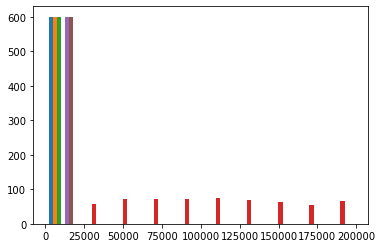

In [26]:
plt.hist(data)

C:\Users\INDIA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='City.Population', ylabel='count'>

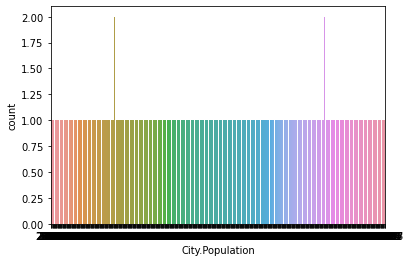

In [27]:
sns.countplot(data['City.Population'])

C:\Users\INDIA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Work.Experience', ylabel='count'>

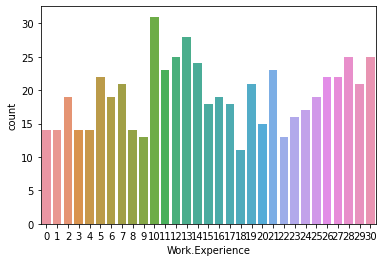

In [28]:
sns.countplot(data['Work.Experience'])

C:\Users\INDIA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Marital.Status', ylabel='count'>

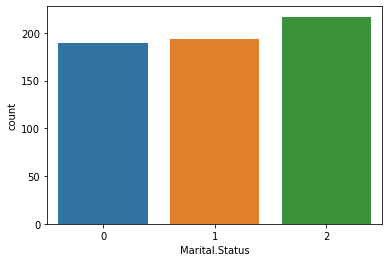

In [29]:
sns.countplot(data['Marital.Status'])

C:\Users\INDIA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Undergrad', ylabel='count'>

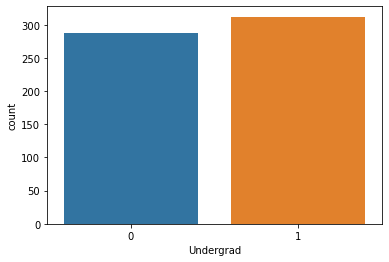

In [30]:
sns.countplot(data['Undergrad'])

C:\Users\INDIA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Taxable.Income', ylabel='count'>

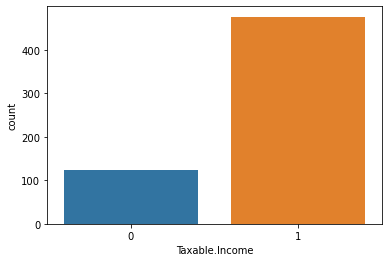

In [31]:
sns.countplot(data['Taxable.Income'])

(array([124.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 476.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

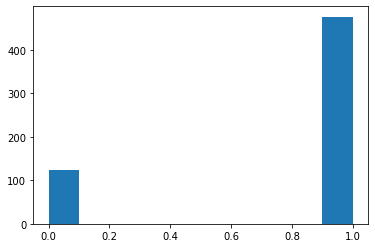

In [32]:
plt.hist(data['Taxable.Income'])

(array([288.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 312.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

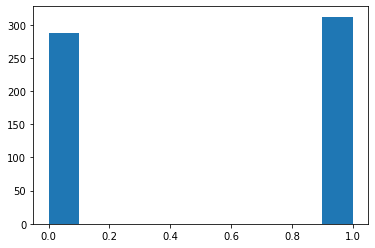

In [33]:
plt.hist(data['Undergrad'])

(array([189.,   0.,   0.,   0.,   0., 194.,   0.,   0.,   0., 217.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

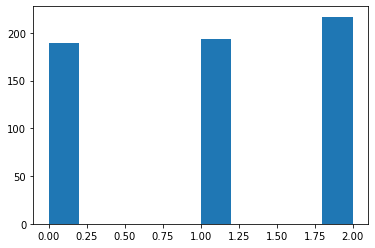

In [34]:
plt.hist(data['Marital.Status'])

(array([70., 61., 68., 60., 64., 64., 51., 61., 42., 59.]),
 array([ 25779. ,  43178.9,  60578.8,  77978.7,  95378.6, 112778.5,
        130178.4, 147578.3, 164978.2, 182378.1, 199778. ]),
 <BarContainer object of 10 artists>)

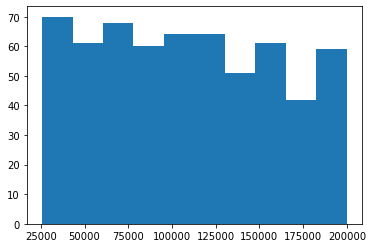

In [35]:
plt.hist(data['City.Population'])

<Figure size 1440x1440 with 0 Axes>

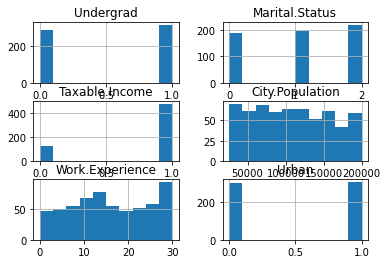

<Figure size 1440x1440 with 0 Axes>

In [36]:
data.hist()
plt.figure(figsize =(20,20))

<Figure size 1440x1440 with 0 Axes>

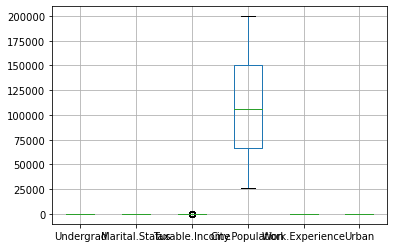

<Figure size 1440x1440 with 0 Axes>

In [37]:
data.boxplot()
plt.figure(figsize =(20,20))

<Figure size 1440x1440 with 0 Axes>

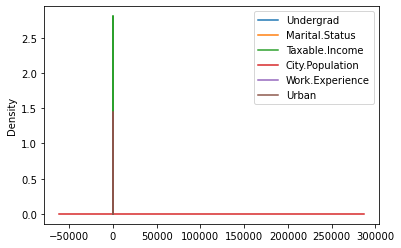

<Figure size 1440x1440 with 0 Axes>

In [38]:
data.plot(kind="kde")
plt.figure(figsize =(20,20))

In [39]:
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,1,50047,10,1
1,1,0,1,134075,18,1
2,0,1,1,160205,30,1
3,1,2,1,193264,15,1
4,0,1,1,27533,28,0
...,...,...,...,...,...,...
595,1,0,1,39492,7,1
596,1,0,1,55369,2,1
597,0,0,1,154058,0,1
598,1,1,1,180083,17,0


In [40]:
(data['Taxable.Income'].unique())

array([1, 0], dtype=int64)

In [41]:
data['Taxable.Income'].value_counts()

1    476
0    124
Name: Taxable.Income, dtype: int64

In [42]:
data['Taxable.Income'].values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics  import accuracy_score,classification_report

In [51]:
data1 =data[['Undergrad','Marital.Status','City.Population','Work.Experience','Urban']]

In [57]:
X=data1
y=data['Taxable.Income']

In [58]:
X

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [59]:
y

0      1
1      1
2      1
3      1
4      1
      ..
595    1
596    1
597    1
598    1
599    1
Name: Taxable.Income, Length: 600, dtype: int64

In [61]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size =0.3,random_state =10)

In [62]:
y_test.value_counts(),y_train.value_counts()

(1    138
 0     42
 Name: Taxable.Income, dtype: int64,
 1    338
 0     82
 Name: Taxable.Income, dtype: int64)

In [63]:
model =RandomForestClassifier(n_estimators=100,max_depth =3, criterion='gini',random_state=10)
model.fit(X_train,y_train)
y_pred =model.predict(X_test)


In [64]:
print(y_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [65]:
accuracy =accuracy_score(y_test,y_pred)
print(accuracy)

0.7666666666666667


In [66]:
pd.crosstab(y_pred,y_test)

Taxable.Income,0,1
row_0,,
1,42,138


In [67]:
count_misclassified =(y_test != y_pred).sum()
count_misclassified

42

In [68]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        42
           1       0.77      1.00      0.87       138

    accuracy                           0.77       180
   macro avg       0.38      0.50      0.43       180
weighted avg       0.59      0.77      0.67       180



C:\Users\INDIA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\INDIA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\INDIA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


----------------------------------------------------------end--------------------------------